## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
Nmice = len(pd.unique(df['Mouse ID']))
Drug = len(pd.unique(df['Drug Regimen']))
summary = pd.DataFrame({'Number of Mice':[Nmice], 'Number of Drug Regimens':[Drug]})
summary

,Number of Mice,Number of Drug Regimens
0,249,10


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id = df.loc[df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
dup_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df["Mouse ID"] == 'g989'

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf = df[df['Mouse ID'].isin(dup_id)==False]
unique = cleandf["Mouse ID"].nunique()
clean_mouse = cleandf
clean_mouse.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
unique

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summ = pd.DataFrame(df.groupby('Drug Regimen').count())
summ['Mean'] = df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
summ['Median'] = df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
summ['SEM'] = (df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'])
summ['Variance'] = df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
summ = summ[['Mouse ID','Mean','Median','SEM','Variance']]
summ['Mean'] = summ['Mean'].map('{:,.2f}'.format)
summ['Median'] = summ['Median'].map('{:,.2f}'.format)
summ['SEM'] = summ['SEM'].map('{:,.3f}'.format)
summ['Variance'] = summ['Variance'].map('{:,.2f}'.format)
summ = summ.rename_axis('Drug Regimen', axis='columns')
summ = summ.rename_axis(' ', axis='rows')
summ


Drug Regimen,Mouse ID,Mean,Median,SEM,Variance
,,,,,
Capomulin,230,40.68,41.56,0.329,24.95
Ceftamin,178,52.59,51.78,0.470,39.29
Infubinol,178,52.88,51.82,0.492,43.13
Ketapril,188,55.24,53.70,0.604,68.55
Naftisol,186,54.33,52.51,0.596,66.17
Placebo,181,54.03,52.29,0.581,61.17
Propriva,161,52.32,50.85,0.513,42.35
Ramicane,228,40.22,40.67,0.321,23.49
Stelasyn,181,54.23,52.43,0.573,59.45


In [8]:
df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
x = df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
x

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

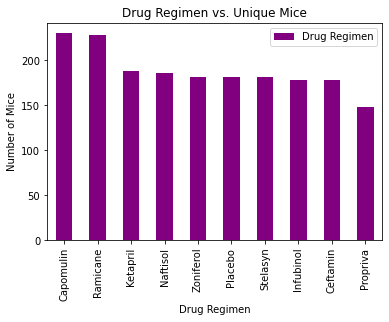

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
bar = cleandf["Drug Regimen"].value_counts()
bar.plot(kind="bar", facecolor="purple", legend=True)
plt.title("Drug Regimen vs. Unique Mice")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.pyplot.bar(cleandf['Drug Regimen'], height, width=0.8, bottom=None, *, align='center')


SyntaxError: invalid syntax (<ipython-input-11-cfb9e67cc8b6>, line 2)

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
datapoints = summ[["Mouse ID"]]
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,6))
plt.bar(x_axis, datapoints["Mouse ID"], color="r", width = .7)
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = cleandf["Sex"].value_counts()
labels = ['Male', 'Female']
colors = ['teal', 'pink']

plt.pie(gender, explode = (0.1, 0), labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow = True, startangle = 120)


## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
ceftamin = cleandf.loc[cleandf['Drug Regimen']== 'Ceftamin', :]
infubinol = cleandf.loc[cleandf['Drug Regimen']== 'Infubinol', :]
ramicane = cleandf.loc[cleandf['Drug Regimen']== 'Ramicane', : ]
capomulin = cleandf.loc[cleandf['Drug Regimen']== 'Capomulin', :]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceftamin_M = ceftamin.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_M)
infubinol_M = infubinol.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_M)
ramicane_M = ramicane.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_M)
capomulin_M = capomulin.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_M)

# Merge ceftamin
ceftamin_merge = pd.merge(ceftamin_vol, cleandf, on=("Mouse ID", "Timepoint"),how="left")
# Find tumor volume and test merge
tceftamin = ceftamin_merge["Tumor Volume (mm3)"]
ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [27]:
# Merge and test infubinol
infubinol_merge = pd.merge(infubinol_vol, cleandf, on=("Mouse ID", "Timepoint"),how="left")
# Find tumor volume and test merge
tinfubinol = infubinol_merge["Tumor Volume (mm3)"]
infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [28]:
# Merge and test ramicane
ramicane_merge = pd.merge(ramicane_vol, cleandf, on=("Mouse ID", "Timepoint"),how="left")
# Find tumor volume and test merge
tramicane = ramicane_merge["Tumor Volume (mm3)"]
ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [29]:
# Merge and test capomulin
capomulin_merge = pd.merge(capomulin_vol, cleandf, on=("Mouse ID", "Timepoint"),how="left")
# Find tumor volume and test merge
tcapomulin = capomulin_merge["Tumor Volume (mm3)"]
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
# see next cell

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

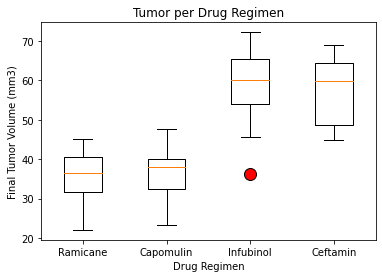

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = [tramicane, tcapomulin, tinfubinol, tceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor per Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')


outlier_dot = dict(markerfacecolor='red',markersize=12)

ax1.boxplot(data_to_plot, labels=["Ramicane","Capomulin","Infubinol","Ceftamin",],flierprops=outlier_dot)

plt.savefig('boxplot')
plt.show()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
